Количество всех проданных товаров: 4134
Выручка со всех продаж: 863533
Наиболее часто покупаемый продукт: (344, 'Продукт4')
Самый прибыльный продукт: (106568, 'Продукт10')
Наиболее часто покупаемая категория: (890, 'Категория7')
Самая прибыльная категория: (232564, 'Категория7')


<Figure size 1000x1000 with 0 Axes>

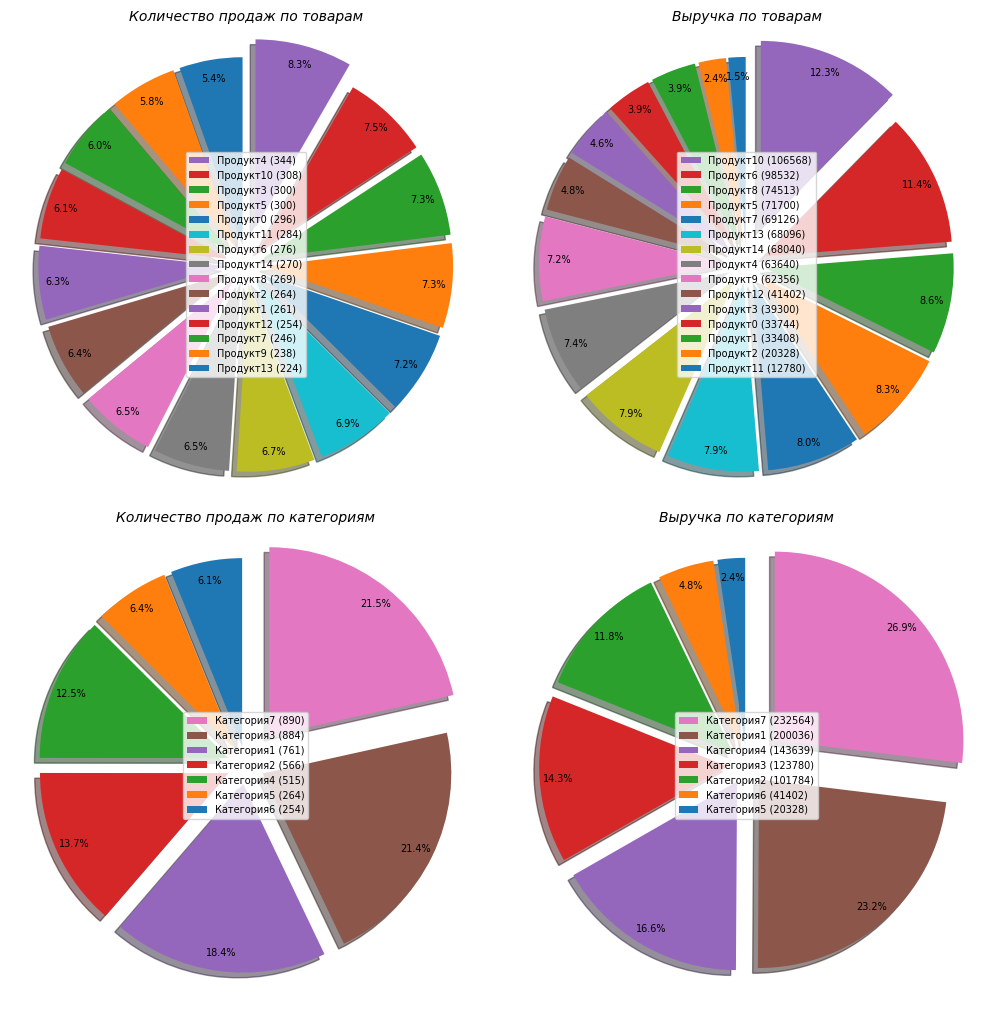

Информация о заказе:
Дата: 2020-01-03T00:00:00; Название товара: Продукт5; Категория товара: Категория3; Кол-во продаж: 1; Цена за единицу: 239; Общая стоиность: 239
Дата: 2020-01-03T00:00:00; Название товара: Продукт12; Категория товара: Категория6; Кол-во продаж: 9; Цена за единицу: 163; Общая стоиность: 1467
Дата: 2020-01-03T00:00:00; Название товара: Продукт4; Категория товара: Категория7; Кол-во продаж: 4; Цена за единицу: 185; Общая стоиность: 740
Дата: 2020-01-03T00:00:00; Название товара: Продукт9; Категория товара: Категория7; Кол-во продаж: 5; Цена за единицу: 262; Общая стоиность: 1310
Дата: 2020-01-03T00:00:00; Название товара: Продукт7; Категория товара: Категория4; Кол-во продаж: 1; Цена за единицу: 281; Общая стоиность: 281
Дата: 2020-01-03T00:00:00; Название товара: Продукт13; Категория товара: Категория1; Кол-во продаж: 8; Цена за единицу: 304; Общая стоиность: 2432
Дата: 2020-01-03T00:00:00; Название товара: Продукт2; Категория товара: Категория5; Кол-во продаж: 1; Це

In [52]:
from csv import reader
from collections import defaultdict
from matplotlib import pyplot

def quicksort(array):
    num = len(array)
    if num <= 1:
        return array
    pivot = array[num // 2][0]
    left = []
    middle = []
    right = []
    for info in array:
        if info[0] < pivot:
            left.append(info)
        elif info[0] > pivot:
            right.append(info)
        else:
            middle.append(info)
    return quicksort(left) + middle + quicksort(right)

def interpolation_search(array, x):
    low = 0
    high = len(array) - 1

    if high < 0:
        return

    while low < high:
        pos = min(high, low + ((x - array[low][0]) * (high - low)) // (array[high][0] - array[low][0]))

        if array[pos][0] == x:
            return pos
        elif array[pos][0] < x:
            low = pos + 1
        else:
            high = pos - 1
    
    if array[low][0] == x:
        return low

def main():
    products_num = defaultdict(int)
    products_total = defaultdict(int)
    categories_num = defaultdict(int)
    categories_total = defaultdict(int)
    rows_array = []

    total_sum = 0
    num_sum = 0

    try:
        with open("Книга.csv") as csv_file:
            csv_reader = reader(csv_file, delimiter="|")

            for row in csv_reader:
                try:
                    num = int(row[4])
                    total = int(row[6])

                    name = row[2]
                    products_num[name] += num
                    products_total[name] += total

                    category = row[3]
                    categories_num[category] += num
                    categories_total[category] += total

                    total_sum += total
                    num_sum += num

                    id = int(row[0])
                    result = None
                    for row2 in rows_array:
                        if row2[0] == id:
                            result = row2
                            break
                    
                    if result:
                        result.append(row[1:])
                    else:
                        rows_array.append([id] + [row[1:]])
                except (IndexError, ValueError):
                    continue

            if not rows_array:
                print("Нет информации")
                return
    except FileNotFoundError:
        print("Файл не найден")
        return
    except UnicodeDecodeError:
        print("Неправильный тип файла")
        return

    products_num_list = [(value, key) for key, value in products_num.items()]
    products_total_list = [(value, key) for key, value in products_total.items()]
    categories_num_list = [(value, key) for key, value in categories_num.items()]
    categories_total_list = [(value, key) for key, value in categories_total.items()]

    products_num_list = quicksort(products_num_list)
    products_total_list = quicksort(products_total_list)
    categories_num_list = quicksort(categories_num_list)
    categories_total_list = quicksort(categories_total_list)

    rows_array = quicksort(rows_array)

    print("Количество всех проданных товаров:", num_sum)
    print("Выручка со всех продаж:", total_sum)

    print("Наиболее часто покупаемый продукт:", products_num_list[-1])
    print("Самый прибыльный продукт:", products_total_list[-1])

    print("Наиболее часто покупаемая категория:", categories_num_list[-1])
    print("Самая прибыльная категория:", categories_total_list[-1])

    pyplot.tight_layout()
    pyplot.rcParams['figure.figsize'] = [10, 10]
    figure, ((axes1, axes2), (axes3, axes4)) = pyplot.subplots(2, 2, layout="constrained", clear=True)
    figure.canvas.manager.set_window_title("Товары")

    explode = [.1] * (len(products_num_list) - 1) + [.2]

    for array, axes, lable in [(products_num_list, axes1, "Количество продаж по товарам"),
                               (products_total_list, axes2, "Выручка по товарам")]:
        sizes = []
        labels = []
        for value, key in array:
            sizes.append(value)
            labels.insert(0, key + " (" + str(value) + ")")
        patches, _, _ = axes.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=0.9, startangle=90, textprops={"fontsize": 7})
        axes.legend(labels=labels, handles=patches[::-1], loc="center", prop={'size': 7})
        axes.set_title(lable, fontstyle="oblique", fontsize="medium")

    explode = [.1] * (len(categories_num_list) - 1) + [.2]

    for array, axes, lable in [(categories_num_list, axes3, "Количество продаж по категориям"),
                               (categories_total_list, axes4, "Выручка по категориям")]:
        sizes = []
        labels = []
        for value, key in array:
            sizes.append(value)
            labels.insert(0, key + " (" + str(value) + ")")
        patches, _, _ = axes.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=0.9, startangle=90, textprops={"fontsize": 7})
        axes.legend(labels=labels, handles=patches[::-1], loc="center", prop={'size': 7})
        axes.set_title(lable, fontstyle="oblique", fontsize="medium")
    
    pyplot.show(block=False)

    num = input("Введите номер заказа: ")
    try:
        num = int(num)
    except ValueError:
        return
    result = interpolation_search(rows_array, num)
    if result:
        print("Информация о заказе:")
        for i in range(1, len(rows_array[result])):
            info = rows_array[result][i]
            print("Дата: " + info[0], "Название товара: " + info[1], "Категория товара: " + info[2], "Кол-во продаж: " + info[3], "Цена за единицу: " + info[4], "Общая стоиность: " + info[5], sep="; ")
    else:
        print("Заказ не найден")

if __name__ == "__main__":
    main()